In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv(r"C:\Users\Muhire Taa\Desktop\Raising\interview_dataset.csv")

C:\Users\Muhire Taa\AppData\Local\Temp\ipykernel_15156\3255387452.py:1: DtypeWarning: Columns (102,116,128,142,154,180,194,246,343,359,367,380,484,615,725,737,806,827,857,859,999,1076,1191,1234,1263,1538,1541,1592,1593,1632,1679,1681,1723,1735,1770,1785,1804,1855,1857,2182,2230,2252,2368,2577,2580,2631,2632,2671,2742,2758,2784,2805,2858,2885,2927,3364,3372,3510,3540,3543,3557,3571,3628,3741,3788,3835,3863,3882,3920,3930,4006,4044,4053,4100,4157,4383,4402,4430,4506,4553,4929,4943,5005,5009,5013,5017,5077,5166,5174,5177,5222,5491,5504,5537,5736,5745,5845,5849,5855,5866,5878,5879,5901,5923,5931,5945,5967,5995,5996,6011,6017,6018,6075,6115,6118,6430,6440,6451,6475,6483,6525,6532,6703,6763,6808) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Muhire Taa\Desktop\Raising\interview_dataset.csv")


In [5]:
df.describe()

,version,duration,survey_start,intro_start,region,district,Surveyor_Name,survey_type,pre_vid,pre_cohort,...,HH Income,HH Production UGX,HH Income + Production UGX,Program Value UGX,Assets,HH Income UGX/Day,HH Production UGX/Day,HH Income + Production UGX/Day,Program Value UGX/Day,HH Income + Production/Day (USD)
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,57.000000,500.00000,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.407743e+09,3900.824000,17.434000,17.440000,3.756000,5.586000,151.926000,1.0,770.421053,2021.43600,...,2.088417e+06,1.276360e+06,3.364777e+06,4.311718e+06,9.469410e+05,5721.689732,3496.877737,9218.567468,11812.926395,2.491505
std,3.669923e+05,1209.003815,84.928153,84.927214,0.655227,3.246488,85.171973,0.0,310.141785,1.17331,...,1.618261e+06,8.075639e+05,2.060387e+06,2.632006e+06,1.349423e+06,4433.592688,2212.503873,5644.896971,7210.975943,1.525648
min,2.407301e+09,1646.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.0,165.000000,2019.00000,...,0.000000e+00,0.000000e+00,1.768000e+05,3.300000e+05,0.000000e+00,0.000000,0.000000,484.383562,904.109589,0.130914
25%,2.407302e+09,3034.000000,3.000000,3.000000,4.000000,3.000000,75.000000,1.0,750.000000,2022.00000,...,9.037500e+05,6.898000e+05,1.890375e+06,2.373025e+06,6.800000e+04,2476.027397,1889.863014,5179.109589,6501.438356,1.399759
50%,2.408021e+09,3711.500000,6.000000,6.000000,4.000000,5.000000,161.000000,1.0,849.000000,2022.00000,...,1.724000e+06,1.176750e+06,3.049250e+06,3.849750e+06,6.000000e+05,4723.287671,3223.972603,8354.109589,10547.260274,2.257867
75%,2.408062e+09,4651.750000,12.250000,12.250000,4.000000,7.000000,221.000000,1.0,1043.000000,2022.00000,...,2.792500e+06,1.653125e+06,4.393300e+06,5.750125e+06,1.200000e+06,7650.684932,4529.109589,12036.438356,15753.767123,3.253091
max,2.408162e+09,8984.000000,1469.000000,1469.000000,4.000000,13.000000,302.000000,1.0,1079.000000,2022.00000,...,8.755000e+06,9.335000e+06,1.598500e+07,1.839000e+07,1.218000e+07,23986.301370,25575.342466,43794.520548,50383.561644,11.836357


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 6905 entries, SubmissionDate to HH Income + Production/Day (USD)
dtypes: float64(6213), int64(346), object(346)
memory usage: 26.3+ MB


In [7]:
#check if there are nans
print(df.isna().any().any())

True


In [8]:
# Check for missing values in each column
print(list[df.isnull().sum()])

list[SubmissionDate                      0
starttime                           0
endtime                             0
version                             0
duration                            0
                                   ..
 HH Production UGX/Day              0
HH Income + Production UGX/Day      0
Program Value UGX/Day               0
STATUS                              0
HH Income + Production/Day (USD)    0
Length: 6905, dtype: int64]


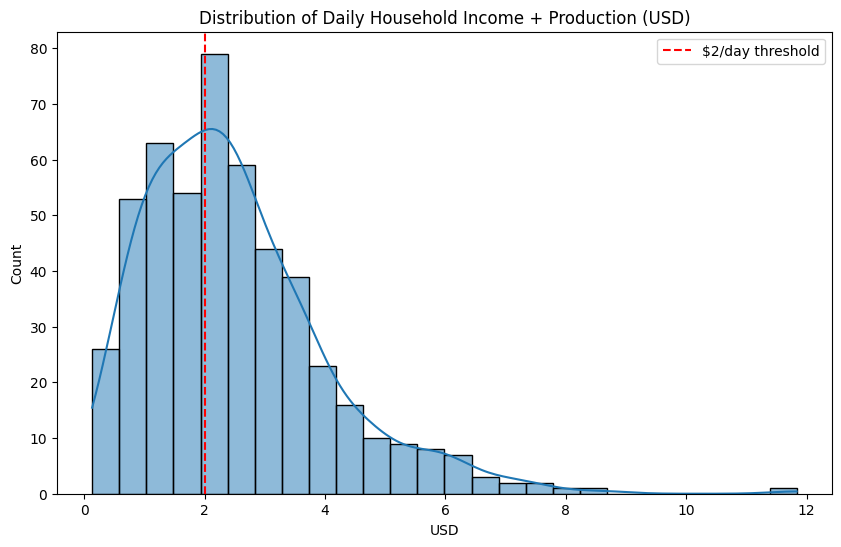

In [9]:
# Clean column names (remove spaces, special characters)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')

# Convert target to USD 
target_col = 'HH_Income_+_Production_Day_USD'

# Analyze distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df[target_col], kde=True)
plt.axvline(x=2, color='red', linestyle='--', label='$2/day threshold')
plt.title('Distribution of Daily Household Income + Production (USD)')
plt.xlabel('USD')
plt.legend()
plt.show()

In [10]:
# Create binary target: at risk (income < $2/day) vs not at risk
df['at_risk'] = (df[target_col] < 2).astype(int)
print(f"Percentage of households at risk: {df['at_risk'].mean() * 100:.2f}%")

Percentage of households at risk: 42.20%


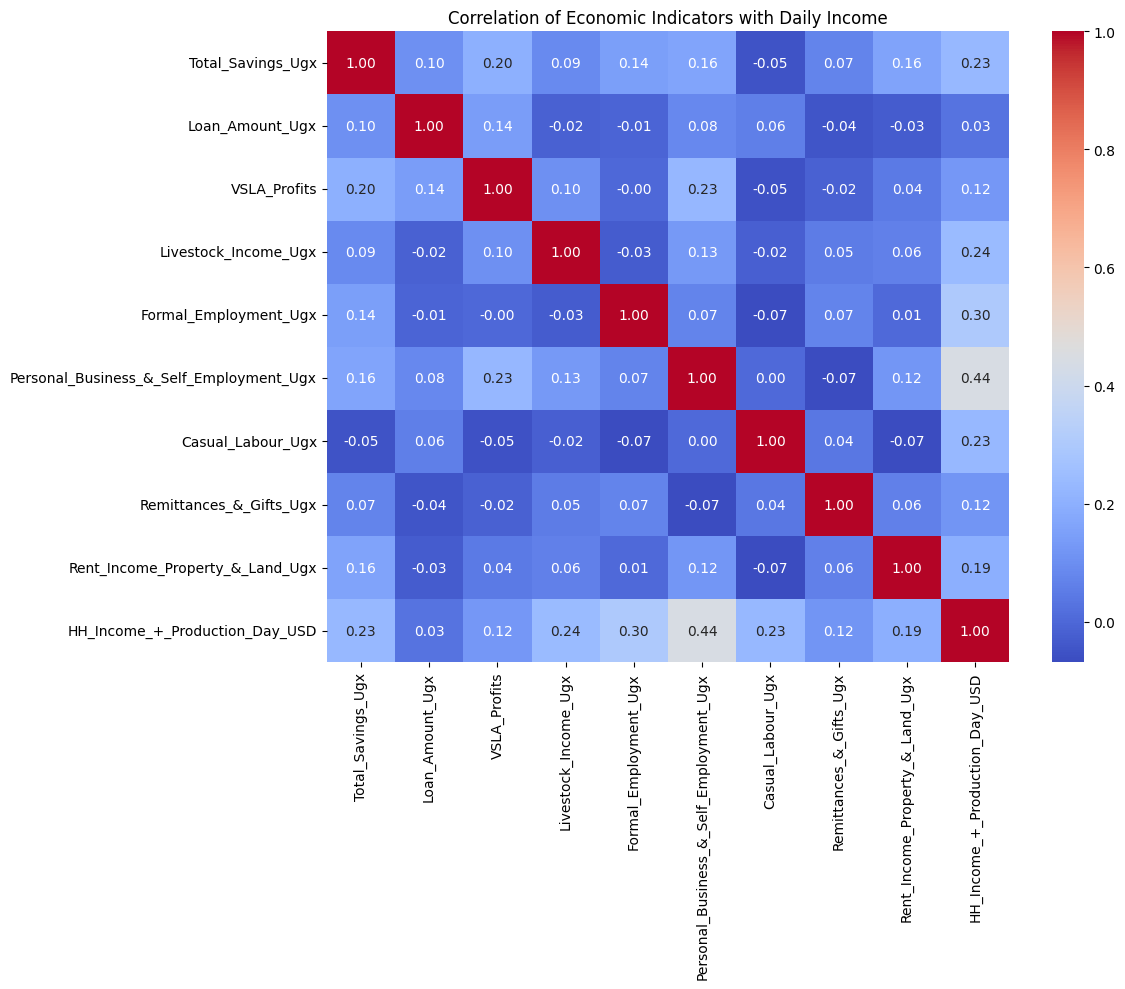

In [11]:
# Analyze economic indicators
economic_cols = [
    'Total_Savings_Ugx', 'Loan_Amount_Ugx', 'VSLA_Profits',
 
    'Livestock_Income_Ugx', 'Formal_Employment_Ugx',
    'Personal_Business_&_Self_Employment_Ugx', 'Casual_Labour_Ugx',
    'Remittances_&_Gifts_Ugx', 'Rent_Income_Property_&_Land_Ugx'
]

# Create correlation heatmap for economic indicators
corr_matrix = df[economic_cols + [target_col]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Economic Indicators with Daily Income')
plt.tight_layout()
plt.show()

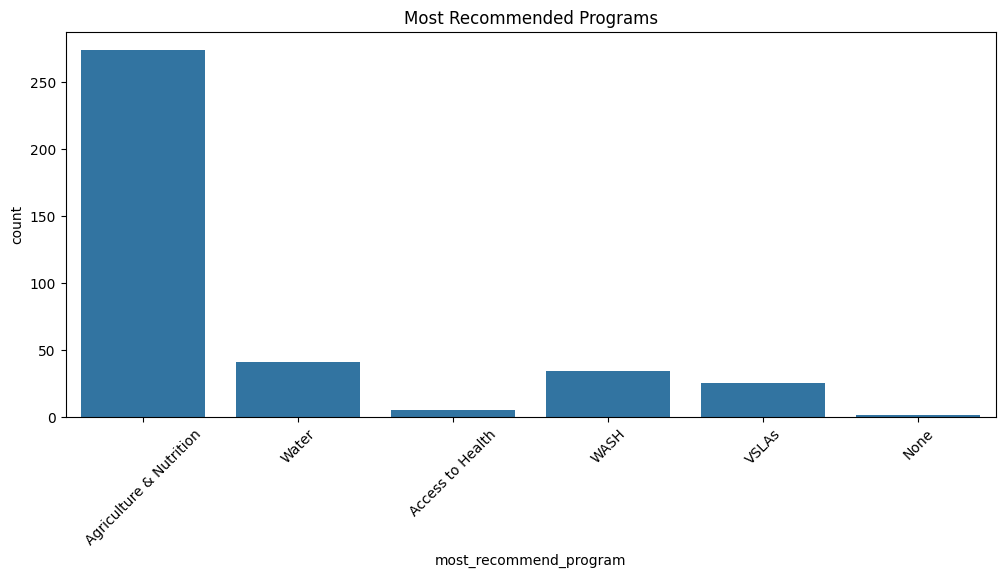

In [12]:
# Analyze program preferences
program_dict = {1: 'Agriculture & Nutrition', 2: 'WASH', 3: 'Water',
                4: 'Access to Health', 5: 'VSLAs', 99: 'None'}

# Convert program codes to names
df['most_recommend_program'] = df['most_recommend_rtv_program'].map(program_dict)
df['least_recommend_program'] = df['least_recommend_rtv_program'].map(program_dict)

# Visualize program preferences
plt.figure(figsize=(12, 5))
sns.countplot(x='most_recommend_program', data=df)
plt.title('Most Recommended Programs')
plt.xticks(rotation=45)
plt.show()

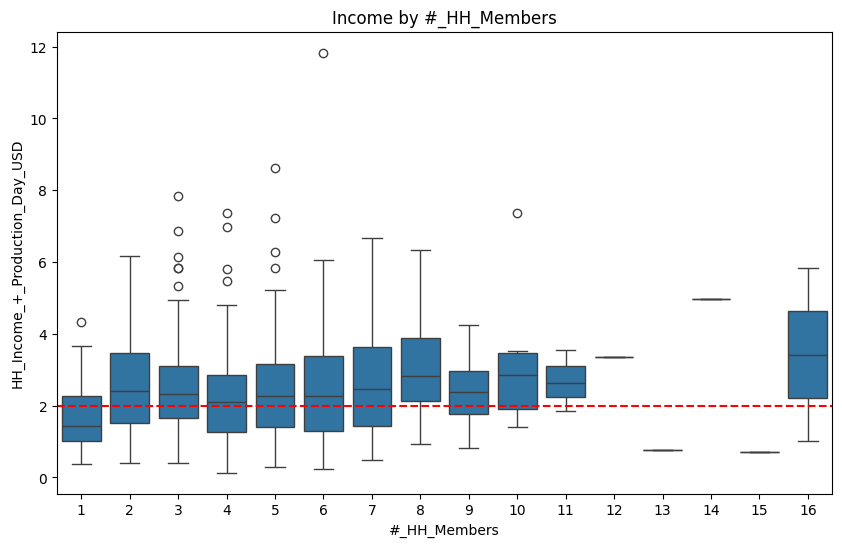

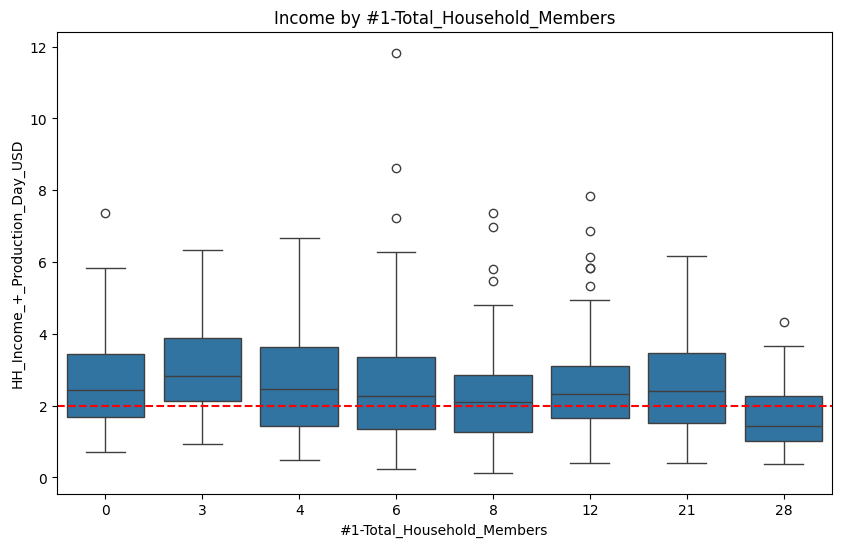

In [13]:
# Analyze household composition
household_cols = ['#_HH_Members', '#1-Total_Household_Members']
for col in household_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y=target_col, data=df)
        plt.title(f'Income by {col}')
        plt.axhline(y=2, color='red', linestyle='--')
        plt.show()

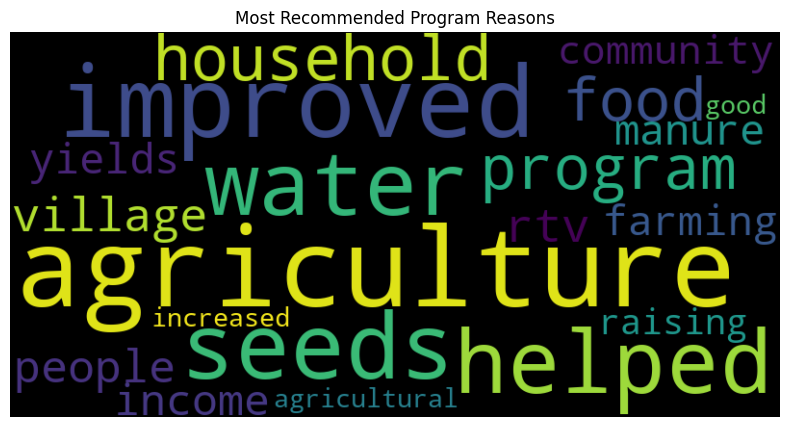

In [14]:
#Handle missing text
df['most_recommend_rtv_program_reason'] = df['most_recommend_rtv_program_reason'].fillna('')

#TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=20, stop_words='english')
text_features = tfidf.fit_transform(df['most_recommend_rtv_program_reason'])

#Get the feature names and sum TF-IDF scores across all documents
feature_names = tfidf.get_feature_names_out()
scores = text_features.toarray().sum(axis=0)

#Create a dictionary mapping terms to their summed TF-IDF score
tfidf_dict = dict(zip(feature_names, scores))

#Generate the word cloud from the TF-IDF dictionary
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(tfidf_dict)

#Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Recommended Program Reasons")
plt.axis('off')
plt.show()



In [15]:
# Preprocessing for numerical features
numeric_features = [
    'Total_Savings_Ugx', 'Loan_Amount_Ugx', 'Interest', '#_HH_Members',
    'VSLA_Profits', 'Vegetable_Income_Ugx', 'Seasonal_Vegetable_Value_Ugx',
    'consumption_exp_monthly', 'consumption_exp_*annual', 'Total_Expenses',
    'Formal_Employment_Ugx', 'Personal_Business_&_Self_Employment_Ugx',
    'Casual_Labour_Ugx', 'Remittances_&_Gifts_Ugx', 'Rent_Income_Property_&_Land_Ugx',
    'Seasonal_Crops_Income_Ugx', 'Perenial_Crops_Income_Ugx', 'Livestock_Income_Ugx',
    'Livestock_Asset_Value', 'Assets', 'Program_Value_UGX_Day'
]

# Create list of available numerical features
available_numeric = [col for col in numeric_features if col in df.columns]

# Impute missing values for numerical features
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[available_numeric] = imputer.fit_transform(df[available_numeric])

# Create ratios and derived features
df['debt_to_savings_ratio'] = df['Loan_Amount_Ugx'] / (df['Total_Savings_Ugx'] + 1)  # Add 1 to avoid division by zero
df['income_per_member'] = df[target_col] / df['#_HH_Members']
df['expense_to_income_ratio'] = df['Total_Expenses'] / (df['HH_Income_UGX_Day'] + 1)
df['debt_to_income_ratio'] = df['Loan_Amount_Ugx'] / (df['HH_Income_UGX_Day'] + 1)  
df['assets_to_income_ratio'] = df['Assets'] / (df['HH_Income_UGX_Day'] + 1)  
df['agriculture_dependency'] = df['Seasonal_Crops_Income_Ugx'] / (df['HH_Income_UGX_Day'] + 1)
df['livestock_dependency'] = df['Livestock_Income_Ugx'] / (df['HH_Income_UGX_Day']+1)

# Create income source diversity score
income_sources = [
    'Formal_Employment_Ugx', 'Personal_Business_&_Self_Employment_Ugx',
    'Casual_Labour_Ugx', 'Remittances_&_Gifts_Ugx', 'Rent_Income_Property_&_Land_Ugx',
    'Seasonal_Crops_Income_Ugx', 'Livestock_Income_Ugx'
]

available_income_sources = [col for col in income_sources if col in df.columns]
df['income_source_count'] = (df[available_income_sources] > 0).sum(axis=1)

# Process categorical features
categorical_features = [
    '#2-Spouse_can_read_and_write', '#4-Material_on_Walls', '#5-Roofing_Materials',
    '#6-Fuel_Source_for_Cooking', '#7-Type_of_Toilet_Facilty', 
    '#8-Every_Member_at_least_ONE_Pair_of_Shoes', 'STATUS'
]

available_categorical = [col for col in categorical_features if col in df.columns]

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=available_categorical, drop_first=True)

# Process text data if available
if 'most_recommend_rtv_program_reason' in df.columns:
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    # Fill missing values
    df['most_recommend_rtv_program_reason'] = df['most_recommend_rtv_program_reason'].fillna('')
    
    # Create TF-IDF features
    tfidf = TfidfVectorizer(max_features=50, stop_words='english')
    text_features = tfidf.fit_transform(df['most_recommend_rtv_program_reason'])
    
    # Convert to DataFrame
    text_df = pd.DataFrame(
        text_features.toarray(),
        columns=[f'text_feature_{i}' for i in range(text_features.shape[1])]
    )
    
    # Concatenate with main dataframe
    df_encoded = pd.concat([df_encoded, text_df], axis=1)

In [16]:
df_encoded.drop(columns=['SubmissionDate','starttime','endtime','pre_vid','text_audit','pre_cohort','version','duration','survey_start','intro_start'], inplace=True)

In [17]:
df_encoded.set_index('date_collection', inplace=True)
df_encoded

,region,district,Surveyor_Name,Surveyor_Name2,survey_type,project_type,sid_2,sid_2_again,pre_district,pre_subcounty,...,text_feature_40,text_feature_41,text_feature_42,text_feature_43,text_feature_44,text_feature_45,text_feature_46,text_feature_47,text_feature_48,text_feature_49
date_collection,,,,,,,,,,,,,,,,,,,,,
2024-08-07 00:00:00,4,2,90,Owunyesiga Aloysious,1,Standard,SW_13848,SW_13848,Kanungu,Nyamirama,...,0.367346,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.294106
2024-08-02 00:00:00,4,2,49,Akandinda Ivan,1,GAC,SW_22223,SW_22223,Kanungu,NaN,...,0.457429,0.0,0.000000,0.392758,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2024-08-03 00:00:00,4,2,65,Kato Mailet,1,Standard,SW_20406,SW_20406,Kanungu,Kanyantorogo,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.790144,0.000000
2024-08-07 00:00:00,2,9,34,Kabibi Alex,1,Standard,KA-NO8464,KA-NO8464,Kaliro,Gadumire,...,0.000000,0.0,0.000000,0.000000,0.757907,0.0,0.000000,0.0,0.000000,0.000000
2024-08-02,4,6,150,Kato Christopher,1,Standard,MW-6865,MW-6865,Kyenjojo,Kihuura,...,0.000000,0.0,0.364812,0.000000,0.000000,0.0,0.000000,0.0,0.603117,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-02,4,4,4,Ainomugisa Sharon Flower,1,Standard,MW-633,MW-633,Kagadi_Standard,Rugashaari,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.417066,0.0,0.000000,0.000000
2024-08-08,4,7,243,Turinayo Promise,1,Standard,SWMT-AY5343,SWMT-AY5343,Rubanda,Bufundi,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.341355
2024-07-31 00:00:00,4,3,271,Angelah Ainembabazi,1,Standard,SW_60878,SW_60878,Rukungiri,Nyakishenyi,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.860547,0.000000


In [18]:
non_numeric_cols = [col for col in df_encoded.columns if not np.issubdtype(df_encoded[col].dtype, np.number)]
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['Surveyor_Name2', 'project_type', 'sid_2', 'sid_2_again', 'pre_district', 'pre_subcounty', 'pre_parish', 'pre_cluster', 'pre_village', 'pre_cycle', 'pre_name', 'pre_hhid', 'treat_status', 'stream', 'hh_category', 'track_status', 'first_name_corrected', 'last_name_corrected', 'hhh_fullname', 'HomesteadPhoto', 'hhh_religion_other', 'hhh_tribe_other', 'spouse_fname', 'spouse_lname', 'spouse_fullname', 'member1_name_first', 'member1_name_second', 'member1_name', 'member1_sch_dropout_r', 'member1_sch_dropout_others', 'member2_name_first', 'member2_name_second', 'member2_name', 'member2_sch_dropout_r', 'member2_sch_dropout_others', 'member3_name_first', 'member3_name_second', 'member3_name', 'member3_sch_dropout_r', 'member4_name_first', 'member4_name_second', 'member4_name', 'member4_sch_dropout_r', 'member4_sch_dropout_others', 'member5_name_first', 'member5_name_second', 'member5_name', 'member6_name_first', 'member6_name_second', 'member6_name', 'member6_sch_dropout

In [19]:
df_encoded.drop(columns=non_numeric_cols, inplace=True)


In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 2024-08-07 00:00:00 to 2024-08-06 00:00:00
Columns: 6606 entries, region to text_feature_49
dtypes: float64(6281), int32(1), int64(324)
memory usage: 25.2+ MB


In [21]:
# fill rows with missign data
df_encoded.fillna(0, inplace=True)

In [25]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from joblib import dump
# Define features and target
feature_cols = [col for col in df_encoded.columns if col not in ['at_risk', target_col, 'most_recommend_rtv_program_reason', 'least_recommend_rtv_program_reason']]
X = df_encoded[feature_cols]
y = df_encoded['at_risk']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# # Baseline model
# baseline_model = LogisticRegression(class_weight='balanced', max_iter=1000)
# baseline_model.fit(X_train, y_train)
# y_pred_baseline = baseline_model.predict(X_test)
# print("Baseline Logistic Regression Results:")
# print(classification_report(y_test, y_pred_baseline))

# # Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)
# y_pred_rf = rf_model.predict(X_test)
# print("Random Forest Results:")
# print(classification_report(y_test, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
# Save the trained model using Joblib
dump(gb_model, 'risk_model_.joblib')
print("Gradient Boosting model saved as 'risk_model_.joblib'")

# # Feature importance analysis
# if hasattr(rf_model, 'feature_importances_'):
#     importances = rf_model.feature_importances_
#     indices = np.argsort(importances)[-20:]  # Top 20 features
#     plt.figure(figsize=(12, 10))
#     plt.title('Top 20 Feature Importances')
#     plt.barh(range(len(indices)), importances[indices], align='center')
#     plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
#     plt.xlabel('Relative Importance')
#     plt.tight_layout()
#     plt.show()

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        53

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125

Gradient Boosting model saved as 'risk_model_.joblib'
